# Loan Application Status Prediction


# Problem Statement:


This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.



Independent Variables:



Loan_ID



Gender

Married

Dependents

Education

Self_Employed



ApplicantIncome

CoapplicantIncome

Loan_Amount

Loan_Amount_Term



Credit History



Property_Area



Dependent Variable (Target Variable):



Loan_Status


You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 1



# Importing required libraries


In [1]:
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
from sklearn.preprocessing import power_transform,StandardScaler,LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_roc_curve,plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Loading DataSet


In [2]:
df=pd.read_csv("Loan Application.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA(Exploratory Data Analysis)

In [3]:
df=df.drop("Loan_ID",axis=1)             #Removing dummy columns which is not required for analyisis

In [4]:
df.describe(include='all')          # Describe the details of all columns and rows

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [5]:
df.shape      #No. of rows and columns


(614, 12)

In [6]:
df.info()       #To get columns,null values and dtype


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
df.dtypes   #To get data types


Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Hence we have found object type variables in the data


# Data Visualization


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Credit_History'>

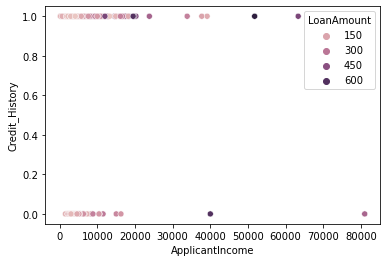

In [9]:
sns.scatterplot(df.ApplicantIncome,df['Credit_History'],df.LoanAmount)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

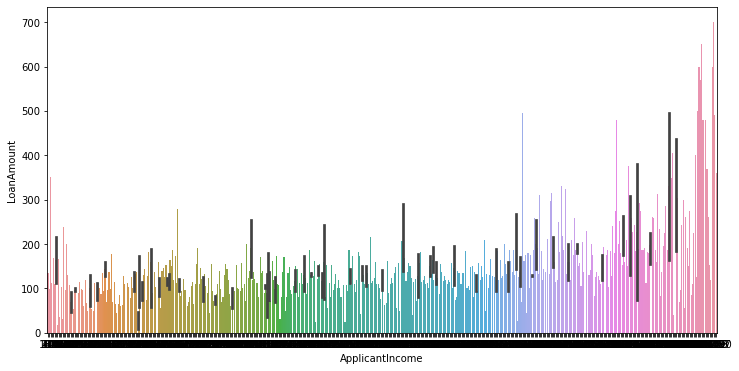

In [10]:
plt.figure(figsize=(12,6))
sns.barplot('ApplicantIncome','LoanAmount',data=df)

As above figure shows the loan amount depends on applicant income directly proportional


In [12]:
for i in df.columns:
    plt.figure(figsize=(10,6))
    sns.barplot(df['Loan_Status'],df[i],edgecolor='black',linewidth=3)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 720x432 with 0 Axes>

# Finding null values


In [13]:
df.isnull().sum()    #To find null values


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Missing values Imputaton


In [14]:
#Missing values handling using mean,mode,median

df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mode()[0])
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].median())

<AxesSubplot:>

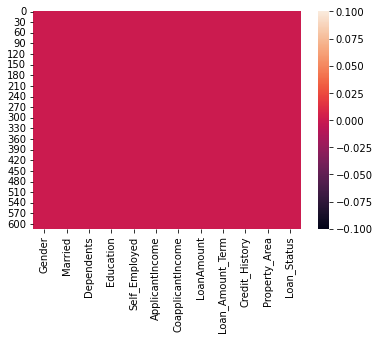

In [15]:
sns.heatmap(df.isnull())


Hence there is no null values in the data


# Encoding Data using LabelEncoder()


In [16]:
df["Dependents"]=df["Dependents"].map(lambda x:x.rstrip("+")) # removing + sign from dependant column
df["Dependents"]=df.Dependents.astype(float)     #To convert object type into float type

In [17]:
LE=LabelEncoder()
var=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
for i in var:
    df[i]=LE.fit_transform(df[i])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3.0,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1.0,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2.0,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [18]:
df.dtypes


Gender                 int32
Married                int32
Dependents           float64
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

Hence object type columns converted into float or int type


# Correlationship between features and labels


In [19]:
df.corr()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106404,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146212,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163017,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.114971,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106404,0.146212,0.163017,-0.169436,0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.001963,0.540556


# Correlationship matrix


<AxesSubplot:>

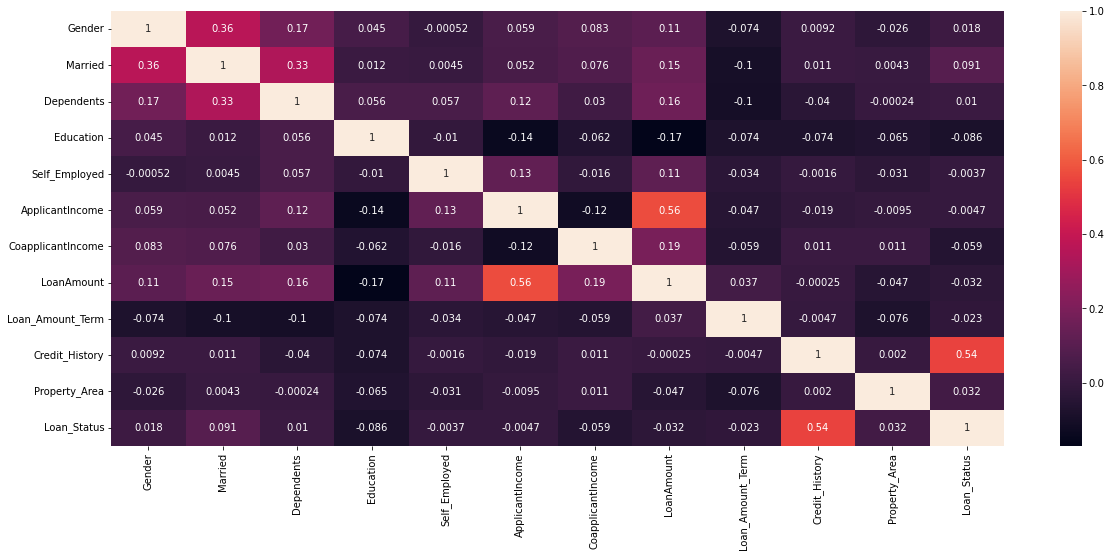

In [20]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)

The above matrix shows positive and negetive correlationship between features and labels


# Finding skewness in the Data


array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel=

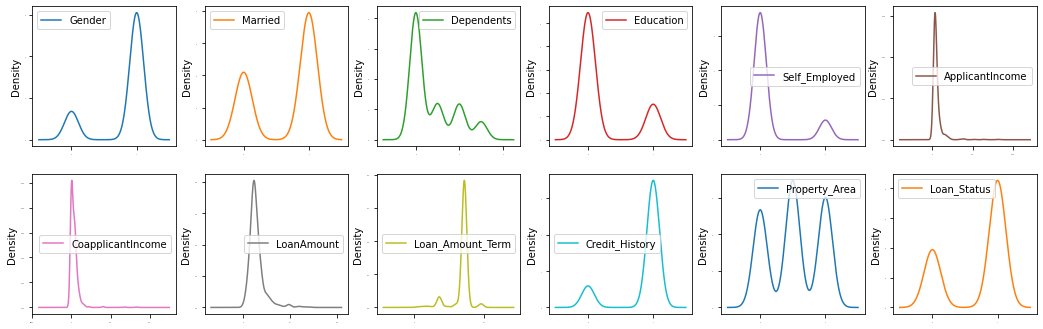

In [21]:
df.plot(kind='density',subplots=True,layout=(6,6),sharex=False,figsize=(18,18),fontsize=1,legend=True)


In [22]:
df.skew().sort_values()  #skewed values


Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Gender              -1.648795
Loan_Status         -0.809998
Married             -0.644850
Property_Area       -0.066196
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
LoanAmount           2.745407
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
dtype: float64

# Plotting Distribution plot


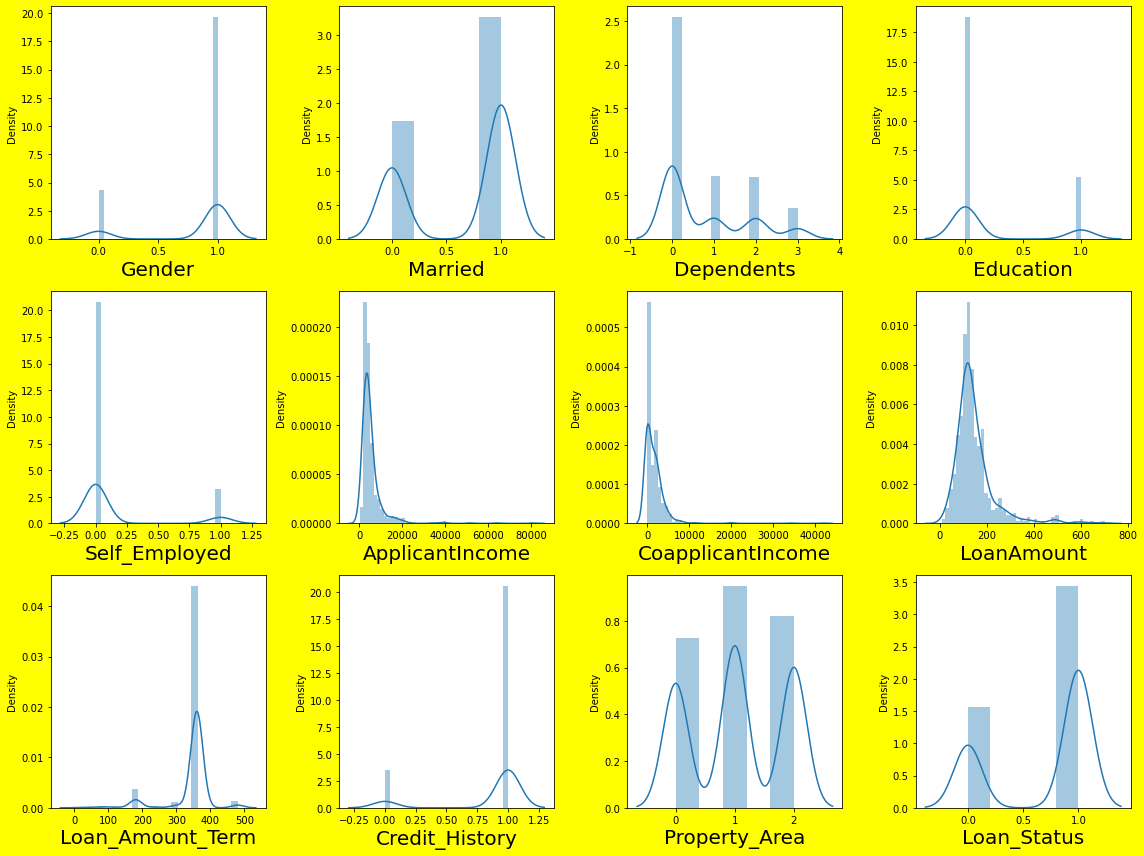

In [23]:
plt.figure(figsize=(16,12),facecolor='yellow')
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
        plotnumber+=1
    plt.tight_layout()

# Finding Outliers


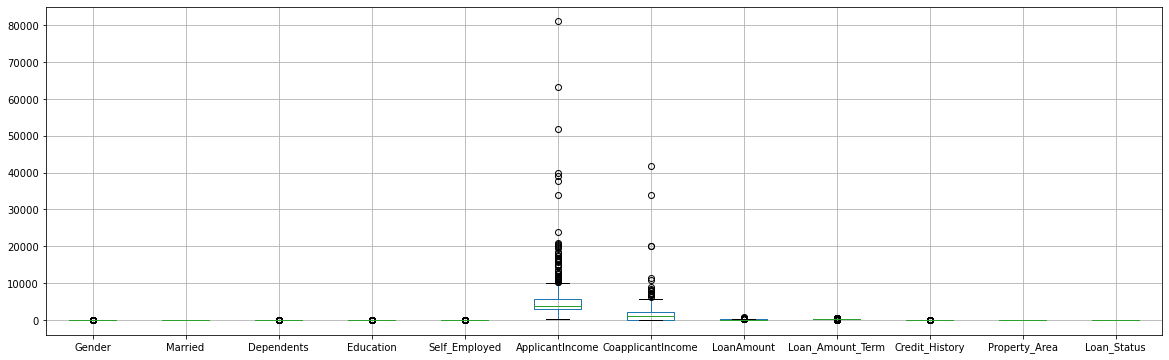

In [24]:
df.boxplot(figsize=(20,12))
plt.subplots_adjust(bottom=0.5)

Hence we have found outliers in more than 2 columns,so we have to remove


# Removing Outliers


In [25]:
(np.abs(zscore(df)<3)).all()


Gender                True
Married               True
Dependents            True
Education             True
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term      True
Credit_History        True
Property_Area         True
Loan_Status           True
dtype: bool

In [26]:
scores = np.abs(zscore(df))
t = 3
np.where(scores<3)

(array([  0,   0,   0, ..., 613, 613, 613], dtype=int64),
 array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))

In [27]:
new_df = df[(scores<3).all(axis=1)]
print(df.shape)
print(new_df.shape)

(614, 12)
(577, 12)


# Removing skewness

In [28]:
new_df.skew()


Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.163426
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [29]:
X=new_df.drop("Loan_Status",axis=1)
y=new_df["Loan_Status"]
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.0,0,0,5849,0.0,120.0,360.0,1.0,2
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3.0,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1.0,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2.0,0,0,7583,0.0,187.0,360.0,1.0,2


In [30]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

In [31]:
x_new=np.sqrt(X[X.columns])

In [32]:
x_new.skew()


Gender              -1.622920
Married             -0.630211
Dependents           0.610338
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      1.208613
CoapplicantIncome    0.207591
LoanAmount           0.376128
Loan_Amount_Term    -2.473358
Credit_History      -1.976043
Property_Area       -0.598165
dtype: float64

# Pre-processing model


In [33]:
x_new=power_transform(x_new)   
x_new

array([[ 0.47713685, -1.36251079, -0.81649549, ...,  0.13076798,
         0.41851254,  1.10166321],
       [ 0.47713685,  0.73393914,  1.04393001, ...,  0.13076798,
         0.41851254, -1.41497784],
       [ 0.47713685,  0.73393914, -0.81649549, ...,  0.13076798,
         0.41851254,  1.10166321],
       ...,
       [ 0.47713685,  0.73393914,  1.04393001, ...,  0.13076798,
         0.41851254,  1.10166321],
       [ 0.47713685,  0.73393914,  1.28826074, ...,  0.13076798,
         0.41851254,  1.10166321],
       [-2.09583477, -1.36251079, -0.81649549, ...,  0.13076798,
        -2.38941464,  0.1555155 ]])

# Scatter relation between features and labels

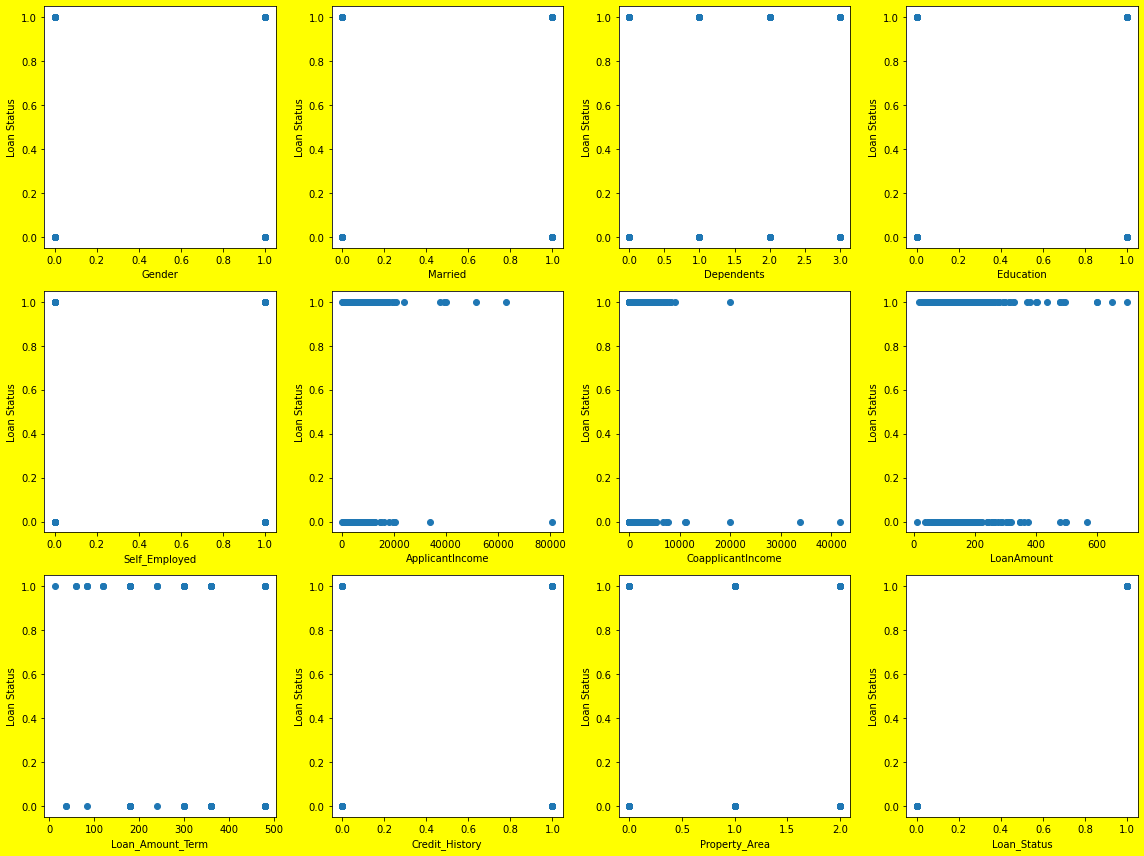

In [35]:
plt.figure(figsize=(16,12),facecolor='yellow')
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        plt.scatter(df[column],df['Loan_Status'])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Loan Status',fontsize=10)
        
        plotnumber+=1
    plt.tight_layout()

# Scaling Data


In [36]:
std=StandardScaler()
x_scaled=pd.DataFrame(std.fit_transform(x_new),columns=X.columns)
x_scaled

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.816495,-0.541961,-0.380580,0.683009,-1.123200,-0.145061,0.130768,0.418513,1.101663
1,0.477137,0.733939,1.043930,-0.541961,-0.380580,0.236029,0.747018,0.009214,0.130768,0.418513,-1.414978
2,0.477137,0.733939,-0.816495,-0.541961,2.627567,-0.527023,-1.123200,-1.433345,0.130768,0.418513,1.101663
3,0.477137,0.733939,-0.816495,1.845150,-0.380580,-0.792426,0.895177,-0.145061,0.130768,0.418513,1.101663
4,0.477137,-1.362511,-0.816495,-0.541961,-0.380580,0.730044,-1.123200,0.246407,0.130768,0.418513,1.101663
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.816495,-0.541961,-0.380580,-0.587331,-1.123200,-1.288849,0.130768,0.418513,-1.414978
573,0.477137,0.733939,1.414106,-0.541961,-0.380580,0.036476,-1.123200,-2.337524,-2.563235,0.418513,-1.414978
574,0.477137,0.733939,1.043930,-0.541961,-0.380580,1.281967,0.197613,1.843996,0.130768,0.418513,1.101663
575,0.477137,0.733939,1.288261,-0.541961,-0.380580,1.165002,-1.123200,0.981517,0.130768,0.418513,1.101663


# Creating Model


# Finding Best Random State

In [37]:
bestrandom=0
max_score=0
#models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    print('Accuracy score is ',acc,'Random state',i)
    
    if acc>max_score:
        max_score=acc
        bestrandom=i
            
        print('Accuracy',max_score,'Random State',i)

Accuracy score is  0.8333333333333334 Random state 0
Accuracy 0.8333333333333334 Random State 0
Accuracy score is  0.8045977011494253 Random state 1
Accuracy score is  0.8160919540229885 Random state 2
Accuracy score is  0.8103448275862069 Random state 3
Accuracy score is  0.7758620689655172 Random state 4
Accuracy score is  0.7931034482758621 Random state 5
Accuracy score is  0.8275862068965517 Random state 6
Accuracy score is  0.8045977011494253 Random state 7
Accuracy score is  0.7873563218390804 Random state 8
Accuracy score is  0.8103448275862069 Random state 9
Accuracy score is  0.8160919540229885 Random state 10
Accuracy score is  0.8045977011494253 Random state 11
Accuracy score is  0.8850574712643678 Random state 12
Accuracy 0.8850574712643678 Random State 12
Accuracy score is  0.8103448275862069 Random state 13
Accuracy score is  0.7701149425287356 Random state 14
Accuracy score is  0.8275862068965517 Random state 15
Accuracy score is  0.8160919540229885 Random state 16
Accur

In [38]:
print('Best Accuracy is',max_score,'Best Random State',bestrandom)


Best Accuracy is 0.896551724137931 Best Random State 494


# trian_test_split method


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=494)
print(x_train.shape)
print(y_train.shape)

(403, 11)
(403,)


# Building Model

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=494)
models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),AdaBoostClassifier()]
for model in models:
    model.fit(x_train,y_train)
    predlr=model.predict(x_test)
    print("Model Name",model)
    print("Accuracy",accuracy_score(y_test,predlr)*100)
    print(confusion_matrix(y_test,predlr))
    print(classification_report(y_test,predlr))
    print('----------------------------------------------------------')

Model Name LogisticRegression()
Accuracy 89.65517241379311
[[ 25  17]
 [  1 131]]
              precision    recall  f1-score   support

           0       0.96      0.60      0.74        42
           1       0.89      0.99      0.94       132

    accuracy                           0.90       174
   macro avg       0.92      0.79      0.84       174
weighted avg       0.90      0.90      0.89       174

----------------------------------------------------------
Model Name KNeighborsClassifier()
Accuracy 84.48275862068965
[[ 24  18]
 [  9 123]]
              precision    recall  f1-score   support

           0       0.73      0.57      0.64        42
           1       0.87      0.93      0.90       132

    accuracy                           0.84       174
   macro avg       0.80      0.75      0.77       174
weighted avg       0.84      0.84      0.84       174

----------------------------------------------------------
Model Name DecisionTreeClassifier()
Accuracy 72.41379310344827

# Cross Validation Score for all models

In [41]:
from sklearn.model_selection import cross_val_score
models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),AdaBoostClassifier()]
for model in models:
    scr=cross_val_score(model,x_scaled,y,cv=5)
    print("Model Name :",model)
    print("Cross validation score is: ", scr.mean()*100)
    print("Mean score :", (scr.mean())*100)
    print("STD :", scr.std()*100)
    print('---------------------------------------')

Model Name : LogisticRegression()
Cross validation score is:  81.98200899550224
Mean score : 81.98200899550224
STD : 2.7790198124777885
---------------------------------------
Model Name : KNeighborsClassifier()
Cross validation score is:  77.64767616191904
Mean score : 77.64767616191904
STD : 3.0416919300334
---------------------------------------
Model Name : DecisionTreeClassifier()
Cross validation score is:  72.44827586206897
Mean score : 72.44827586206897
STD : 2.017979865905531
---------------------------------------
Model Name : RandomForestClassifier()
Cross validation score is:  79.55472263868066
Mean score : 79.55472263868066
STD : 1.885575433769459
---------------------------------------
Model Name : SVC()
Cross validation score is:  81.80809595202398
Mean score : 81.80809595202398
STD : 3.020375233771556
---------------------------------------
Model Name : AdaBoostClassifier()
Cross validation score is:  79.56071964017993
Mean score : 79.56071964017993
STD : 3.051184842585

# HyperParameter tuning using best GridSearchCV method

# Kneighbours method

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=494)
KNC=KNeighborsClassifier()
parameters={'n_neighbors':range(1,10)}
grid=GridSearchCV(KNC,parameters)
grid.fit(x_train,y_train)
print("Best parameters :",grid.best_params_)

Best parameters : {'n_neighbors': 9}


In [43]:
KNC=KNeighborsClassifier(n_neighbors=9)
score=cross_val_score(KNC,x_scaled,y,cv=5)

KNC.fit(x_train,y_train)
pred=KNC.predict(x_test)
acc_score=accuracy_score(y_test,pred)
print("Accuracy score",(acc_score)*100)
print("Cross validation score is: ", score.mean()*100)
print("Mean score :", (score.mean())*100)
print("STD :", score.std()*100)

Accuracy score 89.65517241379311
Cross validation score is:  80.59370314842577
Mean score : 80.59370314842577
STD : 2.6883461436746816


# RandomforestClassifier mothod

In [44]:
rfc=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rfc,
                        param_grid={'min_samples_leaf':range(2,10),'min_samples_split':range(3,10),'max_depth':range(1,5),
                                    "max_features" :["auto", "sqrt", "log2"]},
                        cv=5,
                        n_jobs=-1)     # Use all the cores in your system.For performance improvement.
grid_search.fit(x_train,y_train)
print(grid_search)
print("Best parameters :",grid_search.best_params_)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 5),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})
Best parameters : {'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 7}


In [45]:
rfc=RandomForestClassifier(max_depth=3,max_features='auto',min_samples_leaf=2,min_samples_split=9)
rfc.fit(x_train,y_train)
predlr=rfc.predict(x_test)
print("Model Name",rfc)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Model Name RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=9)
Accuracy 89.65517241379311
[[ 24  18]
 [  0 132]]
              precision    recall  f1-score   support

           0       1.00      0.57      0.73        42
           1       0.88      1.00      0.94       132

    accuracy                           0.90       174
   macro avg       0.94      0.79      0.83       174
weighted avg       0.91      0.90      0.89       174



Hence the SVC model giving a best accuaracy score of 89% and Cross validation score of 81%,so SVC model is best suitable for predicting output


# ROC CURVE

In [47]:
clf=SVC(random_state=494)
clf.fit(x_train,y_train)

SVC(random_state=494)

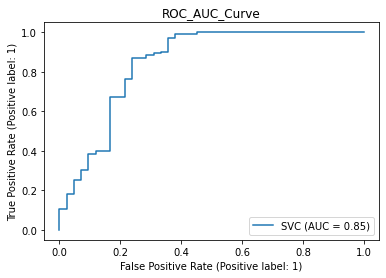

In [48]:
plot_roc_curve(clf,x_test,y_test)
plt.title("ROC_AUC_Curve")
plt.show()